In [1]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

Please enter keyword or hashtag to search: AAL
Please enter how many tweets to analyze: 600


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  94
negative number:  32
neutral number:  474


In [7]:
tweet_list


,0
0,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...
1,@ArgiTuT NGOMONG ABG SM TGN AAL
2,"@RamadasRN @KulaguruK Alledo, enikk malayalam ..."
3,@vherdigris Besok aal pake twibbonnya &lt;4
4,RT @mamashami: Happiness amidest Bombing &amp;...
...,...
595,US #stockstowatch before the bell\n\n🚘#Tesla o...
596,RT @plocaploca: Ihr seid wirklich komplett unf...
597,RT @bml_95: ٣ / ٣ / ١٤٤٣هـ \nطوّق قلب أختي بـ ...
598,"RT @ByERussell: American Airlines is ""planning..."


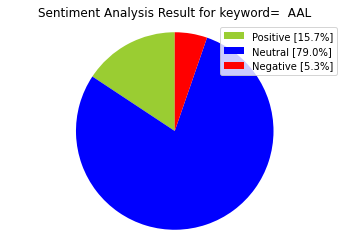

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)


In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...
1,@ArgiTuT NGOMONG ABG SM TGN AAL,@ArgiTuT NGOMONG ABG SM TGN AAL
2,"@RamadasRN @KulaguruK Alledo, enikk malayalam ...","@RamadasRN @KulaguruK Alledo, enikk malayalam ..."
3,@vherdigris Besok aal pake twibbonnya &lt;4,@vherdigris Besok aal pake twibbonnya &lt;4
4,RT @mamashami: Happiness amidest Bombing &amp;...,RT @mamashami: Happiness amidest Bombing &amp;...
...,...,...
591,RT @Ghaleb79147148: صلاة الجماعة من الصحن الحس...,RT @Ghaleb79147148: صلاة الجماعة من الصحن الحس...
592,RT @haider1975ww: 5 ربيع الاول رحيل مولاتنا سك...,RT @haider1975ww: 5 ربيع الاول رحيل مولاتنا سك...
593,RT @haider1975ww: بخيرة النساء \nوذلك لما ودع ...,RT @haider1975ww: بخيرة النساء \nوذلك لما ودع ...
595,US #stockstowatch before the bell\n\n🚘#Tesla o...,US #stockstowatch before the bell\n\n🚘#Tesla o...


In [11]:
tweet_list

,0,text
0,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...
1,@ArgiTuT NGOMONG ABG SM TGN AAL,@ArgiTuT NGOMONG ABG SM TGN AAL
2,"@RamadasRN @KulaguruK Alledo, enikk malayalam ...","@RamadasRN @KulaguruK Alledo, enikk malayalam ..."
3,@vherdigris Besok aal pake twibbonnya &lt;4,@vherdigris Besok aal pake twibbonnya &lt;4
4,RT @mamashami: Happiness amidest Bombing &amp;...,RT @mamashami: Happiness amidest Bombing &amp;...
...,...,...
591,RT @Ghaleb79147148: صلاة الجماعة من الصحن الحس...,RT @Ghaleb79147148: صلاة الجماعة من الصحن الحس...
592,RT @haider1975ww: 5 ربيع الاول رحيل مولاتنا سك...,RT @haider1975ww: 5 ربيع الاول رحيل مولاتنا سك...
593,RT @haider1975ww: بخيرة النساء \nوذلك لما ودع ...,RT @haider1975ww: بخيرة النساء \nوذلك لما ودع ...
595,US #stockstowatch before the bell\n\n🚘#Tesla o...,US #stockstowatch before the bell\n\n🚘#Tesla o...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...,ee jay pablo koi kutta chu ni karega pablo...
1,@ArgiTuT NGOMONG ABG SM TGN AAL,ngomong abg sm tgn aal
2,"@RamadasRN @KulaguruK Alledo, enikk malayalam ...",alledo enikk malayalam ariyan padillanjit...
3,@vherdigris Besok aal pake twibbonnya &lt;4,besok aal pake twibbonnya lt 4
4,RT @mamashami: Happiness amidest Bombing &amp;...,happiness amidest bombing amp blockade ca...
5,"Real price will come out soon,, Follow price t...",real price will come out soon follow price t...
6,"*Make as much as you want, i've made 35K+ last...",make as much as you want i ve made 35k last...
7,will see: $AAL https://t.co/aQZXAztY9i,will see aal
8,"*Make as much as you want, i've made 35K+ last...",make as much as you want i ve made 35k last...
9,"*Make as much as you want, i've made 35K+ last...",make as much as you want i ve made 35k last...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...,ee jay pablo koi kutta chu ni karega pablo...,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
1,@ArgiTuT NGOMONG ABG SM TGN AAL,ngomong abg sm tgn aal,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
2,"@RamadasRN @KulaguruK Alledo, enikk malayalam ...",alledo enikk malayalam ariyan padillanjit...,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
3,@vherdigris Besok aal pake twibbonnya &lt;4,besok aal pake twibbonnya lt 4,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
4,RT @mamashami: Happiness amidest Bombing &amp;...,happiness amidest bombing amp blockade ca...,0.7,0.200000,positive,0.0,0.483,0.517,0.9432
5,"Real price will come out soon,, Follow price t...",real price will come out soon follow price t...,0.2,0.300000,neutral,0.0,1.000,0.000,0.0000
6,"*Make as much as you want, i've made 35K+ last...",make as much as you want i ve made 35k last...,0.3,0.141667,positive,0.0,0.792,0.208,0.6705
7,will see: $AAL https://t.co/aQZXAztY9i,will see aal,0.0,0.000000,neutral,0.0,1.000,0.000,0.0000
8,"*Make as much as you want, i've made 35K+ last...",make as much as you want i ve made 35k last...,0.3,0.141667,positive,0.0,0.784,0.216,0.6705
9,"*Make as much as you want, i've made 35K+ last...",make as much as you want i ve made 35k last...,0.3,0.141667,positive,0.0,0.784,0.216,0.6705


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,435,77.26
positive,94,16.70
negative,34,6.04


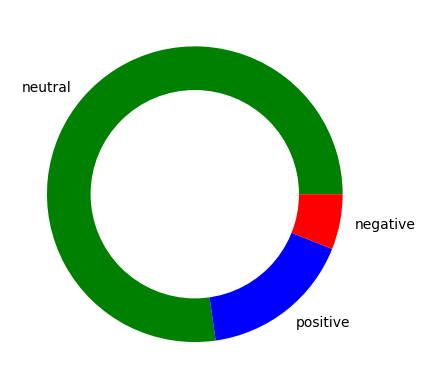

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [22]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [23]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,92.41
neutral,81.46
positive,102.67


In [24]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,16.15
neutral,3.92
positive,17.16


In [25]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [26]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [27]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [28]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [29]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [30]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@qasimk47 @JahanzebBaig12 Ee jay pablo koi kut...,ee jay pablo koi kutta chu ni karega pablo...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,63,13,ee jay pablo koi kutta chu ni karega pablo...,"[, ee, jay, pablo, koi, kutta, chu, ni, karega...","[, ee, jay, pablo, koi, kutta, chu, ni, karega...","[, ee, jay, pablo, koi, kutta, chu, ni, karega..."
1,@ArgiTuT NGOMONG ABG SM TGN AAL,ngomong abg sm tgn aal,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,24,5,ngomong abg sm tgn aal,"[, ngomong, abg, sm, tgn, aal]","[, ngomong, abg, sm, tgn, aal]","[, ngomong, abg, sm, tgn, aal]"
2,"@RamadasRN @KulaguruK Alledo, enikk malayalam ...",alledo enikk malayalam ariyan padillanjit...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,100,10,alledo enikk malayalam ariyan padillanjit...,"[, alledo, enikk, malayalam, ariyan, padillanj...","[, alledo, enikk, malayalam, ariyan, padillanj...","[, alledo, enikk, malayalam, ariyan, padillanj..."
3,@vherdigris Besok aal pake twibbonnya &lt;4,besok aal pake twibbonnya lt 4,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,33,6,besok aal pake twibbonnya lt,"[, besok, aal, pake, twibbonnya, lt, ]","[, besok, aal, pake, twibbonnya, lt, ]","[, besok, aal, pake, twibbonnya, lt, ]"
4,RT @mamashami: Happiness amidest Bombing &amp;...,happiness amidest bombing amp blockade ca...,0.7,0.2,positive,0.0,0.483,0.517,0.9432,130,18,happiness amidest bombing amp blockade ca...,"[, happiness, amidest, bombing, amp, blockade,...","[, happiness, amidest, bombing, amp, blockade,...","[, happi, amidest, bomb, amp, blockad, capit, ..."


In [31]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

563 Number of reviews has 1510 words


In [32]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aachum,aaga,aah,aaki,aal,aalay,aam,aan,...,zawaal,zec,zgeya,zh,zil,znga,zoek,zu,zuad,zufallsstori
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
aal,182
spi,25
tsla,25
aapl,22
e,21
qqq,20
dal,19
airlin,19
kareem,19
imran,18


In [34]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('quran kareem', 18),
 ('kareem surah', 18),
 ('surah aal', 18),
 ('aal imran', 18),
 ('american airlines', 16),
 ('dal ual', 10),
 ('ual luv', 9),
 ('spy qqq', 9),
 ('luv penn', 7),
 ('30 type', 7),
 ('type save', 7),
 ('penn dkng', 6),
 ('dkng spy', 6),
 ('spy tpgy', 6),
 ('tpgy aal', 6),
 ('cei tsla', 6),
 ('amzn nvda', 5),
 ('nvda ba', 5),
 ('aal rcl', 5),
 ('rcl nclh', 5)]

In [36]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('quran kareem surah', 18),
 ('kareem surah aal', 18),
 ('surah aal imran', 18),
 ('dal ual luv', 9),
 ('ual luv penn', 7),
 ('30 type save', 7),
 ('luv penn dkng', 6),
 ('penn dkng spy', 6),
 ('dkng spy tpgy', 6),
 ('spy tpgy aal', 6),
 ('amzn nvda ba', 5),
 ('tpgy aal rcl', 5),
 ('aal rcl nclh', 5),
 ('rcl nclh amc', 5),
 ('nclh amc wish', 5),
 ('amc wish spx', 5),
 ('wish spx arkk', 5),
 ('spx arkk cei', 5),
 ('arkk cei tsla', 5),
 ('cei tsla ccl', 5)]

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
!pip install yfinance

In [39]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [40]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [43]:
AAL = yf.download("AAL", start="2021-10-11", end="2021-10-12", interval = "1h")
AAL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 09:30:00-04:00,20.150000,20.225000,19.849800,20.155001,20.155001,8351885
2021-10-11 10:30:00-04:00,20.155001,20.299999,20.115000,20.277201,20.277201,2318419
2021-10-11 11:30:00-04:00,20.275000,20.510000,20.270000,20.369900,20.369900,3636815
2021-10-11 12:30:00-04:00,20.360001,20.368500,20.160000,20.209999,20.209999,2568038
2021-10-11 13:30:00-04:00,20.207199,20.260000,20.139999,20.172100,20.172100,2005380
2021-10-11 14:30:00-04:00,20.174999,20.280001,20.153500,20.215000,20.215000,1545810
2021-10-11 15:30:00-04:00,20.219999,20.250000,20.120001,20.120001,20.120001,2566635


<AxesSubplot:>

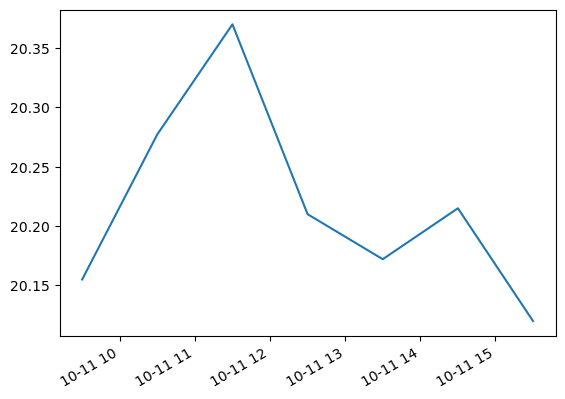

In [44]:
AAL['Adj Close'].plot()